In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images (28x28 to 784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Input size = 784 (28x28)
input_img = Input(shape=(784,))
# Encoding layer (Compression)
encoded = Dense(32, activation='relu')(input_img)
# Decoding layer (Reconstruction)
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model (for viewing compressed features)
encoder = Model(input_img, encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3841 - val_loss: 0.1937
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1833 - val_loss: 0.1540
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1490 - val_loss: 0.1328
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1304 - val_loss: 0.1205
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1196 - val_loss: 0.1126
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1121 - val_loss: 0.1067
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1068 - val_loss: 0.1025
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1028 - val_loss: 0.0993
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0998 - val_loss: 0.0970
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0976 - val_loss: 0.0958
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


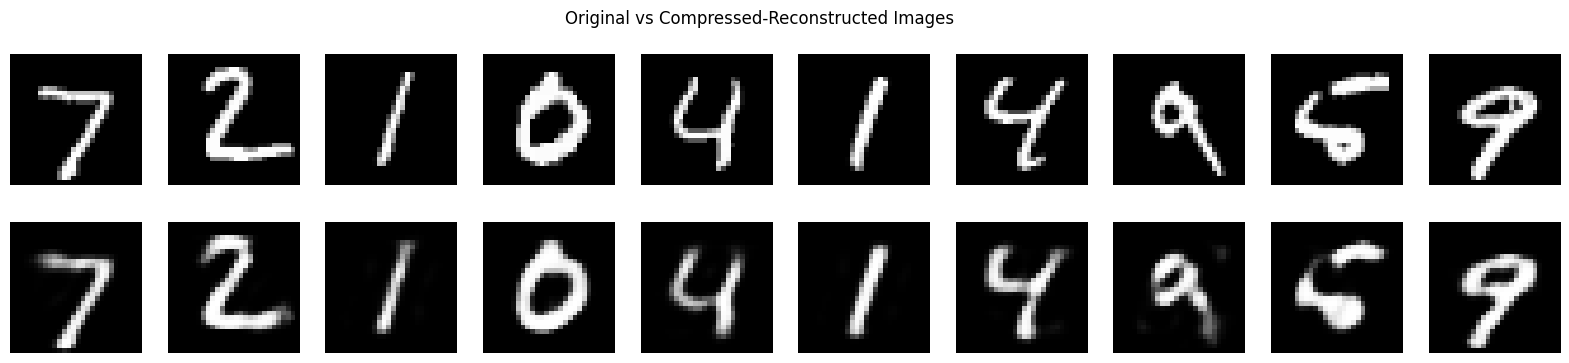

In [ ]:
# Encode and decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.suptitle("Original vs Compressed-Reconstructed Images")
plt.show()


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
# Input
input_img = Input(shape=(784,))
# Encoding
encoded = Dense(64, activation='relu')(input_img)
# Decoding
decoded = Dense(784, activation='sigmoid')(encoded)

# Denoising Autoencoder
autoencoder_denoise = Model(input_img, decoded)
autoencoder_denoise.compile(optimizer='adam', loss='binary_crossentropy')

# Train with noisy input but clean output
autoencoder_denoise.fit(x_train_noisy, x_train,
                        epochs=10,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3394 - val_loss: 0.1852
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1781 - val_loss: 0.1581
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1548 - val_loss: 0.1426
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1410 - val_loss: 0.1333
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1326 - val_loss: 0.1271
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1266 - val_loss: 0.1233
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1231 - val_loss: 0.1208
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1206 - val_loss: 0.1189
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1189 - val_loss: 0.1178
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1176 - val_loss: 0.1170


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


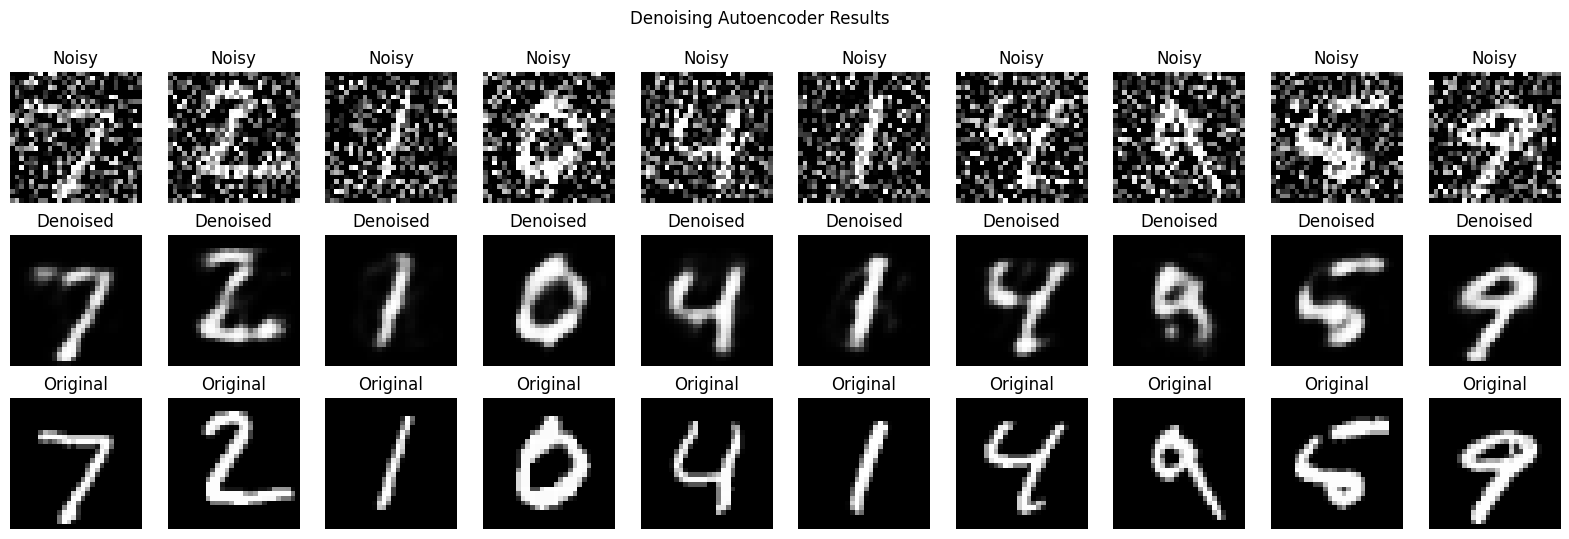

In [ ]:
decoded_imgs = autoencoder_denoise.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Noisy")
    plt.gray()
    ax.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Denoised")
    plt.gray()
    ax.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.axis('off')
plt.suptitle("Denoising Autoencoder Results")
plt.show()
